In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('Edges_Py.xlsx')
# Show contents of the dataframe
randstad_network

,Source,Target,Weight
0,Dordrecht,Rotterdam,25.7
1,Dordrecht,Spijkenisse,37.9
2,Spijkenisse,Rotterdam,23.8
3,Spijkenisse,Vlaardingen,14.2
4,Vlaardingen,Schiedam,5.5
5,Vlaardingen,Delft,16.0
6,Schiedam,Rotterdam,8.0
7,Rotterdam,Delft,15.8
8,Rotterdam,Gouda,26.4
9,Delft,Den Haag,10.9


In [3]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 'Source', 'Target', ['Weight '])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


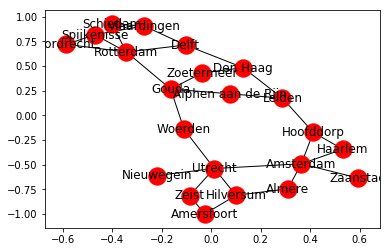

In [4]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

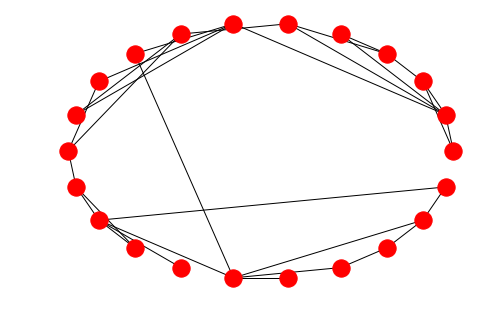

In [5]:
# Plot the graph, using a cicular layout
nx.draw_circular(Randstad_Graph)

In [6]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Dordrecht': 0.0,
 'Rotterdam': 63.91666666666666,
 'Spijkenisse': 3.9166666666666656,
 'Vlaardingen': 4.333333333333333,
 'Schiedam': 2.916666666666666,
 'Delft': 21.500000000000004,
 'Gouda': 81.81666666666668,
 'Den Haag': 25.416666666666668,
 'Woerden': 65.56666666666666,
 'Alphen aan de Rijn': 7.999999999999999,
 'Zoetermeer': 4.233333333333333,
 'Leiden': 36.18333333333333,
 'Hoofddorp': 33.43333333333333,
 'Amsterdam': 53.43333333333333,
 'Haarlem': 0.0,
 'Zaanstad': 0.0,
 'Utrecht': 87.8,
 'Nieuwegein': 0.0,
 'Zeist': 8.066666666666666,
 'Amersfoort': 0.8333333333333333,
 'Hilversum': 15.933333333333332,
 'Almere': 4.699999999999999}

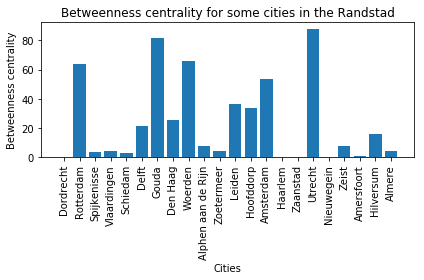

In [7]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()), rotation='vertical')
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.tight_layout()

In [8]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                           weight='Weight ',
                                                             seed=None)
edge_betweenness_weighted

{('Dordrecht', 'Rotterdam'): 0.08658008658008658,
 ('Dordrecht', 'Spijkenisse'): 0.004329004329004329,
 ('Rotterdam', 'Spijkenisse'): 0.04329004329004329,
 ('Rotterdam', 'Schiedam'): 0.09090909090909091,
 ('Rotterdam', 'Delft'): 0.09956709956709957,
 ('Rotterdam', 'Gouda'): 0.22077922077922077,
 ('Spijkenisse', 'Vlaardingen'): 0.04329004329004329,
 ('Vlaardingen', 'Schiedam'): 0.08658008658008658,
 ('Vlaardingen', 'Delft'): 0.10822510822510822,
 ('Delft', 'Den Haag'): 0.19480519480519481,
 ('Gouda', 'Woerden'): 0.3203463203463203,
 ('Gouda', 'Alphen aan de Rijn'): 0.11255411255411256,
 ('Gouda', 'Zoetermeer'): 0.06926406926406926,
 ('Den Haag', 'Leiden'): 0.19480519480519481,
 ('Den Haag', 'Zoetermeer'): 0.08225108225108226,
 ('Woerden', 'Utrecht'): 0.2987012987012987,
 ('Alphen aan de Rijn', 'Leiden'): 0.09090909090909091,
 ('Leiden', 'Hoofddorp'): 0.22077922077922077,
 ('Hoofddorp', 'Amsterdam'): 0.15151515151515152,
 ('Hoofddorp', 'Haarlem'): 0.05627705627705628,
 ('Amsterdam', 'Haa

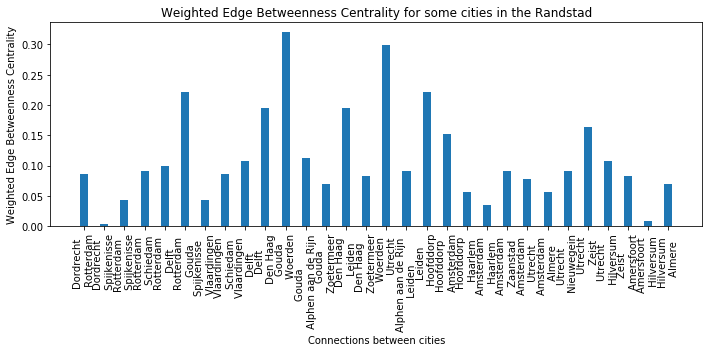

In [9]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weighted)), edge_betweenness_weighted.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weighted)), ppEdges(list(edge_betweenness_weighted.keys())), rotation='vertical')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()

In [10]:
node_betweenness_weighted = nx.betweenness_centrality(Randstad_Graph, k=None, normalized=True, weight='Weight ', endpoints=False, seed=None)
node_betweenness_weighted

{'Dordrecht': 0.0,
 'Rotterdam': 0.24761904761904763,
 'Spijkenisse': 0.0,
 'Vlaardingen': 0.08095238095238096,
 'Schiedam': 0.04761904761904762,
 'Delft': 0.17142857142857143,
 'Gouda': 0.34761904761904766,
 'Den Haag': 0.20952380952380956,
 'Woerden': 0.2904761904761905,
 'Alphen aan de Rijn': 0.06190476190476191,
 'Zoetermeer': 0.03333333333333334,
 'Leiden': 0.2285714285714286,
 'Hoofddorp': 0.18571428571428572,
 'Amsterdam': 0.1761904761904762,
 'Haarlem': 0.0,
 'Zaanstad': 0.0,
 'Utrecht': 0.35714285714285715,
 'Nieuwegein': 0.0,
 'Zeist': 0.08571428571428572,
 'Amersfoort': 0.0,
 'Hilversum': 0.05238095238095239,
 'Almere': 0.01904761904761905}

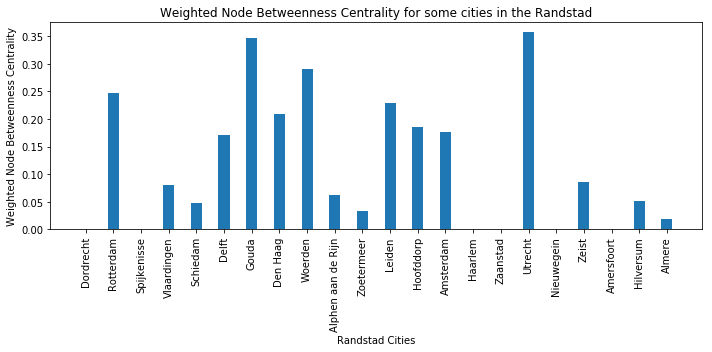

In [11]:
# Node Betweenness Calculation
node_betweenness_weighted = nx.betweenness_centrality(Randstad_Graph, k=None, normalized=True, weight='Weight ', endpoints=False, seed=None)

# Helper function for parsing the Node labels
def ppNodes (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(node_betweenness_weighted)), node_betweenness_weighted.values(), width=0.4)
plt.xticks(range(len(node_betweenness_weighted)), ppNodes(list(node_betweenness_weighted.keys())), rotation='vertical')
plt.title("Weighted Node Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Randstad Cities")
plt.ylabel("Weighted Node Betweenness Centrality")
plt.tight_layout()

In [12]:
node_betweenness_weighted = nx.betweenness_centrality(Randstad_Graph, k=None, normalized=True, weight='Weight ', endpoints=False, seed=None)

node_betweenness_weighted 

{'Dordrecht': 0.0,
 'Rotterdam': 0.24761904761904763,
 'Spijkenisse': 0.0,
 'Vlaardingen': 0.08095238095238096,
 'Schiedam': 0.04761904761904762,
 'Delft': 0.17142857142857143,
 'Gouda': 0.34761904761904766,
 'Den Haag': 0.20952380952380956,
 'Woerden': 0.2904761904761905,
 'Alphen aan de Rijn': 0.06190476190476191,
 'Zoetermeer': 0.03333333333333334,
 'Leiden': 0.2285714285714286,
 'Hoofddorp': 0.18571428571428572,
 'Amsterdam': 0.1761904761904762,
 'Haarlem': 0.0,
 'Zaanstad': 0.0,
 'Utrecht': 0.35714285714285715,
 'Nieuwegein': 0.0,
 'Zeist': 0.08571428571428572,
 'Amersfoort': 0.0,
 'Hilversum': 0.05238095238095239,
 'Almere': 0.01904761904761905}

In [13]:
closeness_centrality= nx.closeness_centrality(Randstad_Graph, distance='Weight ')
closeness_centrality

{'Dordrecht': 0.011674449633088725,
 'Rotterdam': 0.016198704103671708,
 'Spijkenisse': 0.012724188075618034,
 'Vlaardingen': 0.014815860025398616,
 'Schiedam': 0.014894673381090856,
 'Delft': 0.01566813399985078,
 'Gouda': 0.018300653594771243,
 'Den Haag': 0.016474464579901153,
 'Woerden': 0.016769144773616546,
 'Alphen aan de Rijn': 0.016274023558586488,
 'Zoetermeer': 0.01560410164957646,
 'Leiden': 0.016168771173390824,
 'Hoofddorp': 0.01487357461576599,
 'Amsterdam': 0.013743455497382201,
 'Haarlem': 0.012697261019408674,
 'Zaanstad': 0.01023391812865497,
 'Utrecht': 0.01575157515751575,
 'Nieuwegein': 0.013365580448065175,
 'Zeist': 0.013960909453530113,
 'Amersfoort': 0.011935887234284414,
 'Hilversum': 0.012761302868254743,
 'Almere': 0.01120896717373899}

In [14]:
eigenvector_centrality_weighted = nx.eigenvector_centrality(Randstad_Graph, max_iter=10000, tol=1e-15, nstart=None, weight='weight ')
eigenvector_centrality_weighted

{'Dordrecht': 0.23836146436940245,
 'Rotterdam': 0.43634519209474837,
 'Spijkenisse': 0.3027659404778223,
 'Vlaardingen': 0.2641098496475992,
 'Schiedam': 0.22589497318692264,
 'Delft': 0.2902908015927418,
 'Gouda': 0.29570581601888635,
 'Den Haag': 0.19967855874644236,
 'Woerden': 0.1709164523977681,
 'Alphen aan de Rijn': 0.14990262698262355,
 'Zoetermeer': 0.1597602035620686,
 'Leiden': 0.16911218926499225,
 'Hoofddorp': 0.17480182253172424,
 'Amsterdam': 0.2393502418885999,
 'Haarlem': 0.13356298964573973,
 'Zaanstad': 0.07718984553129657,
 'Utrecht': 0.2342718506362573,
 'Nieuwegein': 0.0755520772415186,
 'Zeist': 0.10057676117285785,
 'Amersfoort': 0.07759652984048657,
 'Hilversum': 0.14003452725764048,
 'Almere': 0.12235062516024019}

In [15]:
eigenvector_centrality_weighted = nx.eigenvector_centrality_numpy(Randstad_Graph, weight='weight ')
eigenvector_centrality_weighted

{'Dordrecht': 0.23836146436942038,
 'Rotterdam': 0.4363451920947777,
 'Spijkenisse': 0.3027659404778456,
 'Vlaardingen': 0.2641098496476193,
 'Schiedam': 0.2258949731869396,
 'Delft': 0.29029080159276055,
 'Gouda': 0.2957058160188946,
 'Den Haag': 0.1996785587464481,
 'Woerden': 0.17091645239775713,
 'Alphen aan de Rijn': 0.1499026269826241,
 'Zoetermeer': 0.1597602035620734,
 'Leiden': 0.1691121892649852,
 'Hoofddorp': 0.17480182253169815,
 'Amsterdam': 0.2393502418885553,
 'Haarlem': 0.13356298964571545,
 'Zaanstad': 0.07718984553128123,
 'Utrecht': 0.23427185063621744,
 'Nieuwegein': 0.07555207724150488,
 'Zeist': 0.10057676117283866,
 'Amersfoort': 0.0775965298404705,
 'Hilversum': 0.14003452725761284,
 'Almere': 0.12235062516021537}

In [16]:
A = nx.adjacency_matrix(Randstad_Graph, nodelist=None, weight='weight ')
print(A.todense())

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0

In [181]:
s = dict(nx.all_pairs_dijkstra_path_length(Randstad_Graph, cutoff=None, weight='Weight '))
#sorted(s)
print(s)


{'Dordrecht': {'Dordrecht': 0, 'Rotterdam': 25.7, 'Schiedam': 33.7, 'Spijkenisse': 37.9, 'Vlaardingen': 39.2, 'Delft': 41.5, 'Gouda': 52.099999999999994, 'Den Haag': 52.4, 'Alphen aan de Rijn': 68.69999999999999, 'Zoetermeer': 68.8, 'Woerden': 74.5, 'Leiden': 75.1, 'Hoofddorp': 101.5, 'Utrecht': 102.3, 'Zeist': 111.8, 'Nieuwegein': 114.2, 'Haarlem': 116.6, 'Hilversum': 122.5, 'Amersfoort': 126.6, 'Amsterdam': 128.3, 'Almere': 150.9, 'Zaanstad': 154.5}, 'Rotterdam': {'Rotterdam': 0, 'Schiedam': 8.0, 'Vlaardingen': 13.5, 'Delft': 15.8, 'Spijkenisse': 23.8, 'Dordrecht': 25.7, 'Gouda': 26.4, 'Den Haag': 26.700000000000003, 'Alphen aan de Rijn': 43.0, 'Zoetermeer': 43.1, 'Woerden': 48.8, 'Leiden': 49.400000000000006, 'Hoofddorp': 75.80000000000001, 'Utrecht': 76.6, 'Zeist': 86.1, 'Nieuwegein': 88.5, 'Haarlem': 90.9, 'Hilversum': 96.8, 'Amersfoort': 100.89999999999999, 'Amsterdam': 102.60000000000001, 'Almere': 125.19999999999999, 'Zaanstad': 128.8}, 'Spijkenisse': {'Spijkenisse': 0, 'Vlaard

In [209]:
#pd.DataFrame(s)
df1= pd.DataFrame(s)
df1= df1.reindex(sorted(df1.columns), axis=1)

t = {'Dordrecht': 3635, 'Spijkenisse': 1437, 'Vlaardingen': 1392, 'Schiedam': 1454, 'Rotterdam': 91467, 'Delft': 2309, 'Gouda': 1323, 'Den Haag': 57499, 'Leiden': 3663, 'Hoofddorp': 4503, 'Haarlem': 5567, 'Amsterdam': 140591, 'Woerden': 599, 'Utrecht': 21575, 'Zeist': 949, 'Almere': 7956, 'Amersfoort': 5003, 'Zoetermeer': 3430, 'Alphen aan de Rijn': 1261, 'Hilversum': 1788, 'Nieuwegein': 966, 'Zaanstad': 5016}
df2= pd.DataFrame(t, index = ["PopShare"])
df2= df2.reindex(sorted(df2.columns), axis=1)

df3= df1.mul(df2.values[0], axis= 0)
#df3 = df1*df2
for col in df3:
    print(df3.mean)

 

<bound method DataFrame.mean of                         Almere  Alphen aan de Rijn  Amersfoort  Amsterdam  \
Almere                     0.0            848905.2    417690.0   257774.4   
Alphen aan de Rijn    134548.7                 0.0    114877.1    93692.3   
Amersfoort            262657.5            455773.3         0.0   363217.8   
Amsterdam            4555148.4          10445911.3  10206906.6        0.0   
Delft                 275232.8            126302.3    269460.3   200421.2   
Den Haag             6227141.7           2518456.2   6439888.0  4364174.1   
Dordrecht             548521.5            249724.5    460191.0   466370.5   
Gouda                 130712.4             21961.8     98563.5   120260.7   
Haarlem               371875.6            348494.2    595669.0   191504.8   
Hilversum              50779.2            155556.0     43090.8   108710.4   
Hoofddorp             266577.6            213892.5    447598.2   120680.4   
Leiden                313552.8             7

<bound method DataFrame.mean of                         Almere  Alphen aan de Rijn  Amersfoort  Amsterdam  \
Almere                     0.0            848905.2    417690.0   257774.4   
Alphen aan de Rijn    134548.7                 0.0    114877.1    93692.3   
Amersfoort            262657.5            455773.3         0.0   363217.8   
Amsterdam            4555148.4          10445911.3  10206906.6        0.0   
Delft                 275232.8            126302.3    269460.3   200421.2   
Den Haag             6227141.7           2518456.2   6439888.0  4364174.1   
Dordrecht             548521.5            249724.5    460191.0   466370.5   
Gouda                 130712.4             21961.8     98563.5   120260.7   
Haarlem               371875.6            348494.2    595669.0   191504.8   
Hilversum              50779.2            155556.0     43090.8   108710.4   
Hoofddorp             266577.6            213892.5    447598.2   120680.4   
Leiden                313552.8             7

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality